# 팀 간이 프로젝트 8조 : 집값 예측 경진대회

# 데이터 불러오기

In [216]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [217]:
# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
housing_train = pd.read_csv('train.csv')
housing_test = pd.read_csv('test.csv')

# id 는 제외하고 분석합니다.
housing_train = housing_train.drop('id', axis=1)
housing_test = housing_test.drop('id', axis=1)
#pd.set_option('display.max_columns', None) # 컬럼이 요약되지 않도록 설정합니다.

## 칼럼 정보
* id : 데이터 고유 id - 삭제
* OverallQual : 전반적 재료와 마감 품질
* YearBuilt : 완공 연도
* YearRemodAdd : 리모델링 연도
* ExterQual : 외관 재료 품질
* BsmtQual : 지하실 높이
* TotalBsmtSF : 지하실 면적 
* 1stFlrSF : 1층 면적 
* GrLivArea : 지상층 생활 면적
* FullBath : 지상층 화장실 개수 
* KitchenQual : 부억 품질 
* GarageYrBlt : 차고 완공 연도
* GarageCars: 차고 자리 개수
* GarageArea: 차고 면적 
* target : 집값(달러 단위) - 테스트 데이터에는 존재하지 않음

In [218]:
housing_train.columns

Index(['Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'target'],
      dtype='object')

In [219]:
housing_train # 데이터를 확인합니다.

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [220]:
housing_test

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,8,1932,Ex,3,774,Ex,1932,1932,Ex,2,2008,2008,2008
1346,5,912,TA,1,288,TA,912,912,TA,1,1964,1964,1964
1347,4,861,TA,2,288,TA,861,861,Fa,1,1920,1950,1920
1348,5,1430,TA,2,624,Gd,1430,1430,Ex,2,2004,2005,2004


In [221]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(housing_data)

결측치가 존재하지 않습니다


In [222]:
# 전체 데이터 타입확인
housing_data.dtypes

Overall Qual       int64
Gr Liv Area        int64
Exter Qual        object
Garage Cars        int64
Garage Area        int64
Kitchen Qual      object
Total Bsmt SF      int64
1st Flr SF         int64
Bsmt Qual         object
Full Bath          int64
Year Built         int64
Year Remod/Add     int64
Garage Yr Blt      int64
target             int64
dtype: object

In [223]:
numeric_feature = housing_data.columns[(housing_data.dtypes=="i8") | (housing_data.dtypes== float)]
categorical_feature = housing_data.columns[housing_data.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']
카테고리형 데이터는 다음과 같습니다. 
 ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


## 데이터 전처리

### 고유값 변경
- 품질관련 피처(ExterQual, Kitchen Qual, Bsmt Qual)의 값 변경
* Po(Poor), Fa(Fair), TA(Typical/Average), Gd(Good), Ex(Excellent)에 대해서 각 1점에서 부터 5점까지로 점수 부여한다.

In [224]:
housing_train["Exter Qual"].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

In [225]:
number_list = {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1}
number_list

{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

In [226]:
housing_train["Exter Qual"] = housing_train["Exter Qual"].map(number_list)
housing_train["Kitchen Qual"] = housing_train["Kitchen Qual"].map(number_list)
housing_train["Bsmt Qual"] = housing_train["Bsmt Qual"].map(number_list)

In [227]:
housing_train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,10,2392,5,3,968,5,2392,2392,5,2,2003,2003,2003,386250
1,7,1352,4,2,466,4,1352,1352,5,2,2006,2007,2006,194000
2,5,900,3,1,288,3,864,900,3,1,1967,1967,1967,123000
3,5,1174,3,2,576,4,680,680,3,1,1900,2006,2000,135000
4,7,1958,4,3,936,4,1026,1026,4,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,4,2,422,3,872,888,5,2,1996,1997,1996,204000
1346,9,2748,4,3,850,5,1850,1850,5,2,2006,2006,2006,390000
1347,5,1214,3,1,318,3,1214,1214,3,2,1967,1967,1967,143000
1348,5,894,3,2,440,3,864,894,4,1,1974,1974,1974,131000


In [228]:
housing_test["Exter Qual"] = housing_test["Exter Qual"].map(number_list)
housing_test["Kitchen Qual"] = housing_test["Kitchen Qual"].map(number_list)
housing_test["Bsmt Qual"] = housing_test["Bsmt Qual"].map(number_list)

In [229]:
housing_test

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,9,1800,4,2,702,5,1800,1800,5,2,2007,2007,2007
1,6,1082,3,1,240,3,1082,1082,3,1,1948,1950,1948
2,6,1573,4,2,440,4,756,769,4,2,2000,2000,2000
3,6,2443,4,3,744,4,1158,1158,4,2,2004,2004,2004
4,5,1040,3,2,686,3,1040,1040,3,1,1968,1968,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,8,1932,5,3,774,5,1932,1932,5,2,2008,2008,2008
1346,5,912,3,1,288,3,912,912,3,1,1964,1964,1964
1347,4,861,3,2,288,3,861,861,2,1,1920,1950,1920
1348,5,1430,3,2,624,4,1430,1430,5,2,2004,2005,2004


### 피처 추가

In [230]:
# 1. 완공년도와 리모델링 년도를 비교해서 리모델링 했을경우 리모델링 년도를 기준으로 한다.
# 트레인 데이터셋
housing_train["New_year"] = housing_train["Year Built"]
housing_train.loc[housing_train["Year Built"] < housing_train["Year Remod/Add"], 'New_year'] = housing_train["Year Remod/Add"]

# 테스트 데이터셋
housing_test["New_year"] = housing_test["Year Built"]
housing_test.loc[housing_test["Year Built"] < housing_test["Year Remod/Add"], 'New_year'] = housing_test["Year Remod/Add"]

In [231]:
# 2. 2층이상 여부와 상위층 존재할 경우 해당 면적 표시

# 트레인 데이터셋
# 2_1 상위 층 면적
housing_train['2nd flr SF'] = housing_train['Gr Liv Area'] - housing_train['1st Flr SF']
# 2_1 2층 이상 존재 여부
housing_train['2nd flr'] = housing_train['2nd flr SF'].apply(lambda x : 1 if x > 0 else 0)

# 테스트 데이터셋
# 2_1 상위 층 면적
housing_test['2nd flr SF'] = housing_test['Gr Liv Area'] - housing_test['1st Flr SF']
# 2_1 2층 이상 존재 여부
housing_test['2nd flr'] = housing_test['2nd flr SF'].apply(lambda x : 1 if x > 0 else 0)

In [232]:
# 3. 전체면적에대한 피처 추가
# 트레인 데이터셋
housing_train['Total SF'] = housing_train[['Gr Liv Area',"Garage Area", "Total Bsmt SF"]].sum(axis=1)
# 테스트 데이터셋
housing_test['Total SF'] = housing_test[['Gr Liv Area',"Garage Area", "Total Bsmt SF"]].sum(axis=1)

In [264]:
# 추가여부 확인
housing_train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target,New_year,2nd flr SF,2nd flr,Total SF
0,10,2392,5,3,968,5,2392,2392,5,2,2003,2003,2003,386250,2003,0,0,5752
1,7,1352,4,2,466,4,1352,1352,5,2,2006,2007,2006,194000,2007,0,0,3170
2,5,900,3,1,288,3,864,900,3,1,1967,1967,1967,123000,1967,0,0,2052
3,5,1174,3,2,576,4,680,680,3,1,1900,2006,2000,135000,2006,494,1,2430
4,7,1958,4,3,936,4,1026,1026,4,2,2005,2005,2005,250000,2005,932,1,3920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,4,2,422,3,872,888,5,2,1996,1997,1996,204000,1997,868,1,3050
1346,9,2748,4,3,850,5,1850,1850,5,2,2006,2006,2006,390000,2006,898,1,5448
1347,5,1214,3,1,318,3,1214,1214,3,2,1967,1967,1967,143000,1967,0,0,2746
1348,5,894,3,2,440,3,864,894,4,1,1974,1974,1974,131000,1974,0,0,2198


# EDA

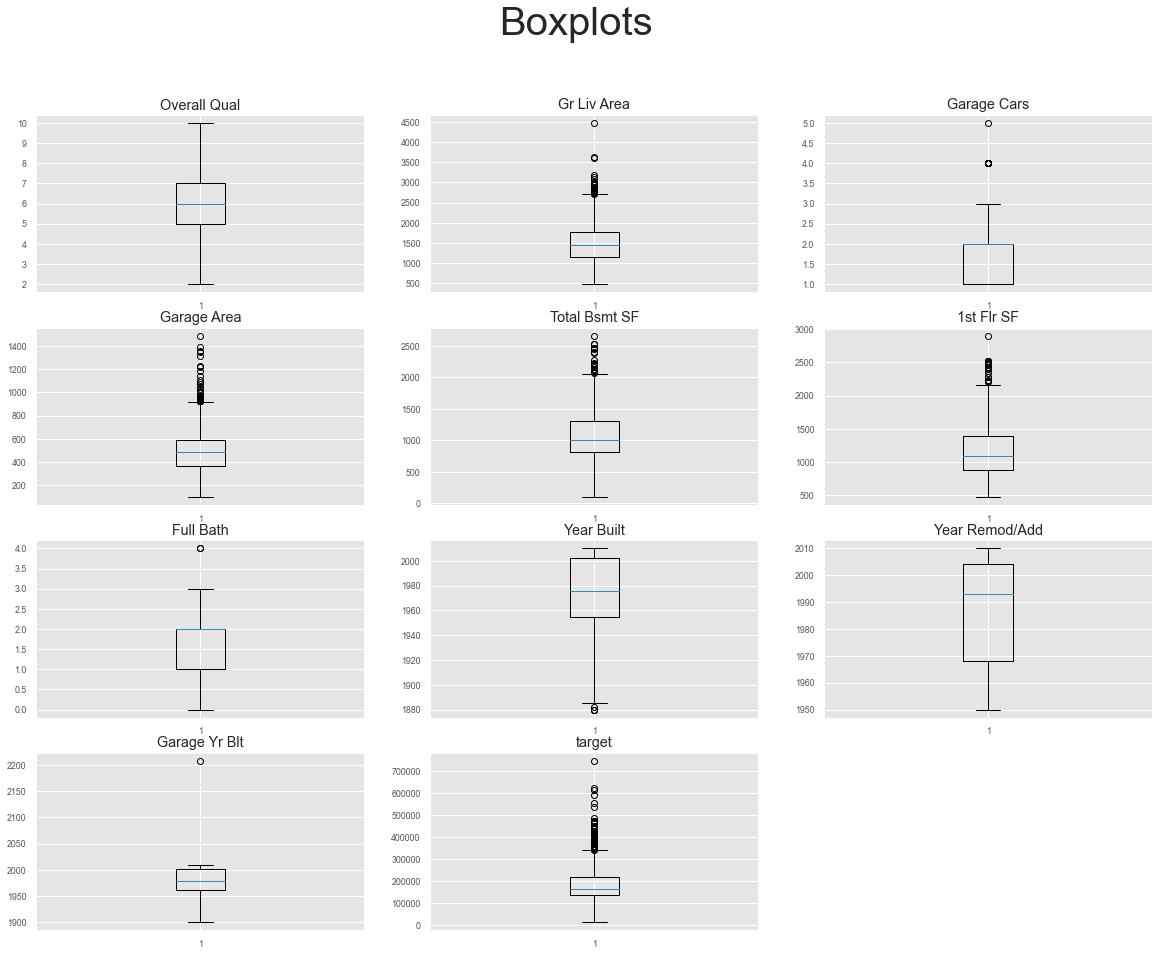

In [238]:
# 박스플랏을 통해 이상치 확인하기
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

# Boxplot 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(feature)):
    plt.subplot(4,3,i+1) # 수치형 데이터가 11개이므로 4*3=12개 자리가 필요합니다.
    plt.title(feature[i])
    plt.boxplot(housing_train[feature[i]])
plt.show()

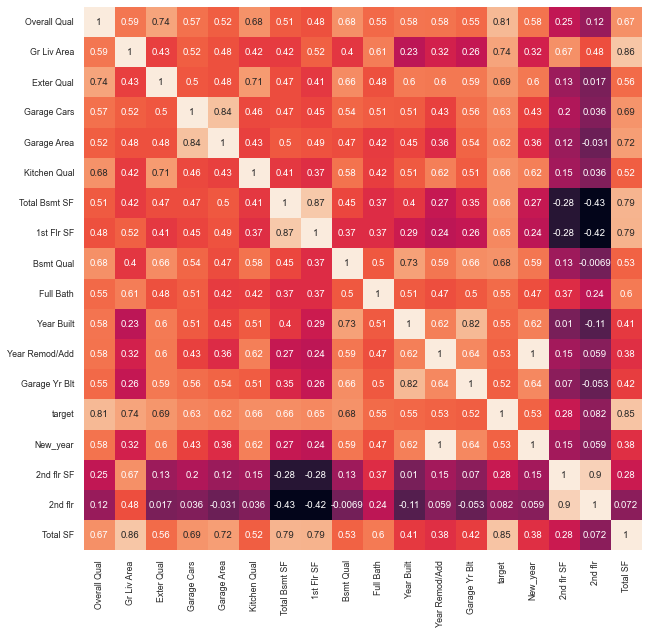

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

data_corr=housing_train.corr()
#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [241]:
#Target 변수와 상관관계가 높은 순으로 출력
corr_order=housing_train.corr().loc[:'Total SF', 'target'].abs().sort_values(ascending=False) #abs() : 절댓값 붙이기 #sort_values(ascending=False) : 오름차순 정렬
corr_order

target            1.000000
Total SF          0.853186
Overall Qual      0.810607
Gr Liv Area       0.742061
Exter Qual        0.689324
Bsmt Qual         0.679005
Total Bsmt SF     0.664047
Kitchen Qual      0.660750
1st Flr SF        0.646843
Garage Cars       0.634497
Garage Area       0.617151
Full Bath         0.554453
Year Built        0.546037
Year Remod/Add    0.529477
New_year          0.529477
Garage Yr Blt     0.517973
2nd flr SF        0.275380
2nd flr           0.081746
Name: target, dtype: float64

In [242]:
# target을 설정해줍니다.
target = "target"

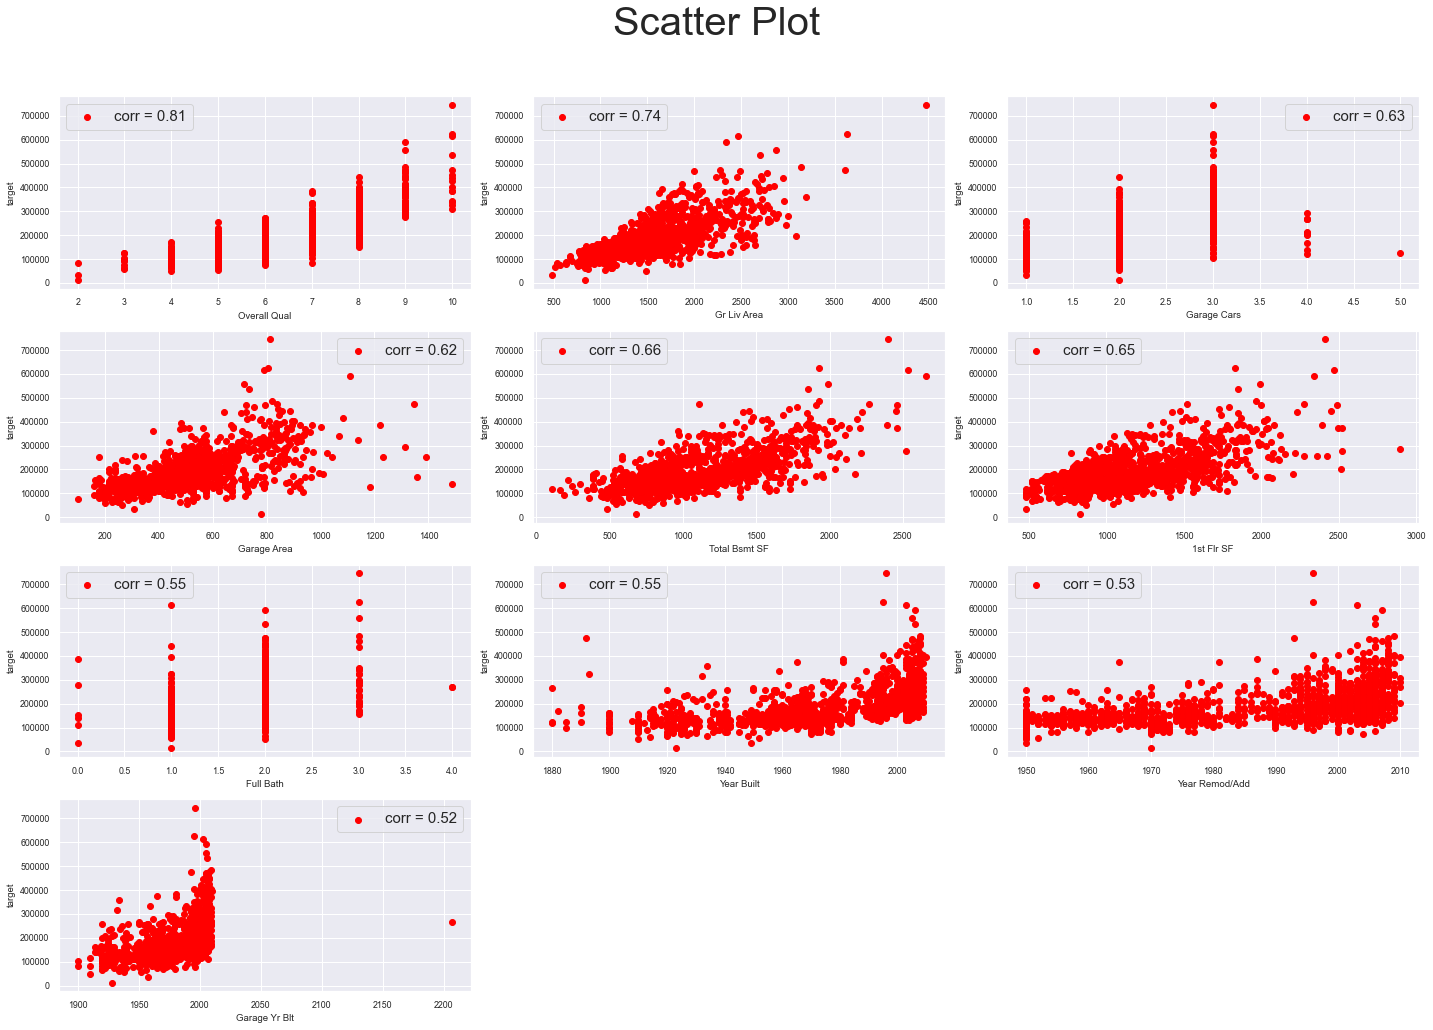

In [243]:
# 스캐터 플랏을 활용 (기본 베이스코드) 
feature = numeric_feature

plt.figure(figsize=(20,15))
plt.suptitle("Scatter Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(feature[:-1])):
    plt.subplot(4,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = housing_train[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(housing_train[feature[i]], housing_train[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

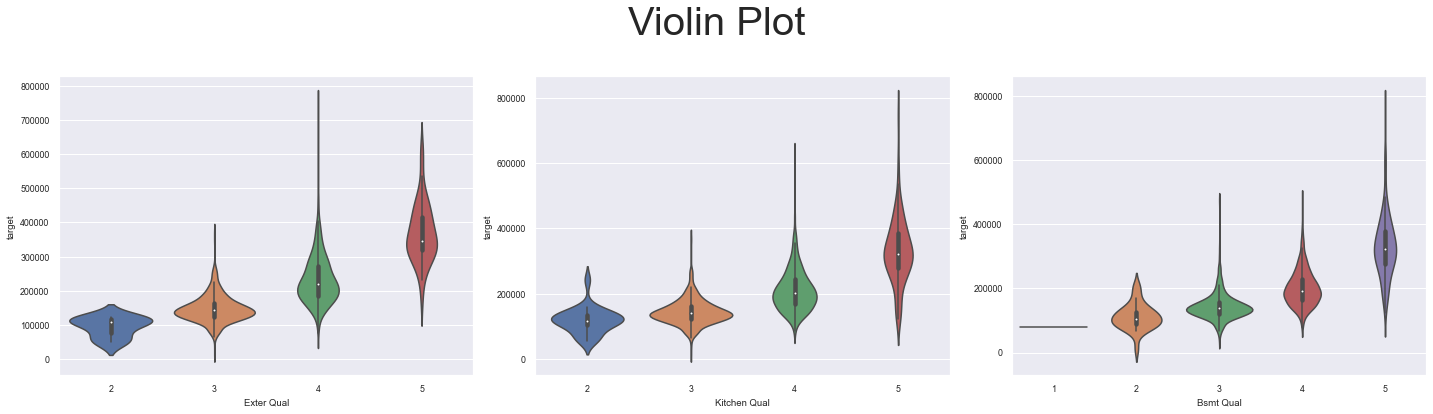

In [244]:
# violin plot(베이스 데이터)
feature = categorical_feature

plt.figure(figsize=(20,6))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    sns.violinplot(x= housing_train[feature[i]], y= housing_train[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 모델링

In [245]:
# ! pip install catboost
# ! pip install ngboost

In [246]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from catboost import CatBoostRegressor, Pool
from ngboost import NGBRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold

In [247]:
# 평가 기준 정의
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

In [248]:
nmae_score = make_scorer(NMAE, greater_is_better=False)
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)

In [249]:
X = housing_train.drop(['target'], axis = 1)
y = np.log1p(housing_train.target)

target = housing_test[X.columns]

In [250]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# LinearRegression(리니어리그레션)
lr_pred = np.zeros(target.shape[0])
lr_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    lr = LinearRegression(normalize=True)
    lr.fit(tr_x, tr_y)
    
    val_pred = np.expm1(lr.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    lr_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = lr.predict(target) / 10
    lr_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(lr_val)} & std = {np.std(lr_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.07960038876627604

2 FOLD Training.....
2 FOLD NMAE = 0.10120970041735555

3 FOLD Training.....
3 FOLD NMAE = 0.0941964851939497

4 FOLD Training.....
4 FOLD NMAE = 0.11864769097138926

5 FOLD Training.....
5 FOLD NMAE = 0.07932312464787475

6 FOLD Training.....
6 FOLD NMAE = 0.10940598004736199

7 FOLD Training.....
7 FOLD NMAE = 0.09623949407132165

8 FOLD Training.....
8 FOLD NMAE = 0.102377164641473

9 FOLD Training.....
9 FOLD NMAE = 0.09977889354992318

10 FOLD Training.....
10 FOLD NMAE = 0.09811210837542311

10FOLD Mean of NMAE = 0.09788910306823481 & std = 0.011374870513941478


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

In [251]:
# Ridge(릿지)
rg_pred = np.zeros(target.shape[0])
rg_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    rg = Ridge()
    rg.fit(tr_x, tr_y)
    
    val_pred = np.expm1(rg.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    rg_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = rg.predict(target) / 10
    rg_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(rg_val)} & std = {np.std(rg_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.07963067401243666

2 FOLD Training.....
2 FOLD NMAE = 0.10116116973532444

3 FOLD Training.....
3 FOLD NMAE = 0.09421712738030051

4 FOLD Training.....
4 FOLD NMAE = 0.1186826968015583

5 FOLD Training.....
5 FOLD NMAE = 0.07933401977519006

6 FOLD Training.....
6 FOLD NMAE = 0.10936651443832444

7 FOLD Training.....
7 FOLD NMAE = 0.09618395069589745

8 FOLD Training.....
8 FOLD NMAE = 0.10170587518648762

9 FOLD Training.....
9 FOLD NMAE = 0.09976077038311323

10 FOLD Training.....
10 FOLD NMAE = 0.0981137404313053

10FOLD Mean of NMAE = 0.0978156538839938 & std = 0.011344296505734718


In [252]:
# Lasso(라쏘)
ls_pred = np.zeros(target.shape[0])
ls_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    ls = Lasso()
    ls.fit(tr_x, tr_y)
    
    val_pred = np.expm1(ls.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    ls_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = ls.predict(target) / 10
    ls_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(ls_val)} & std = {np.std(ls_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.10072258824035503

2 FOLD Training.....
2 FOLD NMAE = 0.13137620703731567

3 FOLD Training.....
3 FOLD NMAE = 0.12290756057142498

4 FOLD Training.....
4 FOLD NMAE = 0.1454158912133414

5 FOLD Training.....
5 FOLD NMAE = 0.11705080914073478

6 FOLD Training.....
6 FOLD NMAE = 0.10873541148438672

7 FOLD Training.....
7 FOLD NMAE = 0.11499240524509707

8 FOLD Training.....
8 FOLD NMAE = 0.1159559405474223

9 FOLD Training.....
9 FOLD NMAE = 0.12231919080062048

10 FOLD Training.....
10 FOLD NMAE = 0.1310997856920435

10FOLD Mean of NMAE = 0.1210575789972742 & std = 0.012041081278737696


In [253]:
# ElasticNet(엘라스틱넷)
el_pred = np.zeros(target.shape[0])
el_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    el = ElasticNet()
    el.fit(tr_x, tr_y)
    
    val_pred = np.expm1(el.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    el_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = el.predict(target) / 10
    el_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(el_val)} & std = {np.std(el_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.09735980007818823

2 FOLD Training.....
2 FOLD NMAE = 0.12467530848967624

3 FOLD Training.....
3 FOLD NMAE = 0.1199909724597509

4 FOLD Training.....
4 FOLD NMAE = 0.14352300511672222

5 FOLD Training.....
5 FOLD NMAE = 0.10908059624686879

6 FOLD Training.....
6 FOLD NMAE = 0.10704898222585961

7 FOLD Training.....
7 FOLD NMAE = 0.10673826744106316

8 FOLD Training.....
8 FOLD NMAE = 0.11407823419476414

9 FOLD Training.....
9 FOLD NMAE = 0.11738733666810448

10 FOLD Training.....
10 FOLD NMAE = 0.12585451093124692

10FOLD Mean of NMAE = 0.11657370138522447 & std = 0.0122856753968664


In [254]:
# GradientBoostingRegressor(그레디언트부스팅)
gbr_pred = np.zeros(target.shape[0])
gbr_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    gbr = GradientBoostingRegressor(random_state = 42, max_depth = 4, learning_rate = 0.05, n_estimators = 1000)
    gbr.fit(tr_x, tr_y)
    
    val_pred = np.expm1(gbr.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    gbr_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    fold_pred = gbr.predict(target) / 10
    gbr_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(gbr_val)} & std = {np.std(gbr_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.08726105907764496

2 FOLD Training.....
2 FOLD NMAE = 0.10118472057947044

3 FOLD Training.....
3 FOLD NMAE = 0.10375085990354016

4 FOLD Training.....
4 FOLD NMAE = 0.11042973239640855

5 FOLD Training.....
5 FOLD NMAE = 0.09979802697087678

6 FOLD Training.....
6 FOLD NMAE = 0.09490455590455972

7 FOLD Training.....
7 FOLD NMAE = 0.10139976310493148

8 FOLD Training.....
8 FOLD NMAE = 0.10075412950367285

9 FOLD Training.....
9 FOLD NMAE = 0.085919460296098

10 FOLD Training.....
10 FOLD NMAE = 0.10575754594996407

10FOLD Mean of NMAE = 0.0991159853687167 & std = 0.007339352514218938


In [255]:
# RandomForestRegressor(랜덤포레스트)
rf_pred = np.zeros(target.shape[0])
rf_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    rf = RandomForestRegressor(random_state = 42, criterion = 'mae')
    rf.fit(tr_x, tr_y)
    
    val_pred = np.expm1(rf.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    rf_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    fold_pred = rf.predict(target) / 10
    rf_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(rf_val)} & std = {np.std(rf_val)}')

1 FOLD Training.....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


1 FOLD NMAE = 0.08430653364457706

2 FOLD Training.....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


2 FOLD NMAE = 0.09896031983846068

3 FOLD Training.....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


3 FOLD NMAE = 0.09499779839507855

4 FOLD Training.....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


4 FOLD NMAE = 0.11760722971815903

5 FOLD Training.....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


5 FOLD NMAE = 0.08936446581987414

6 FOLD Training.....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


6 FOLD NMAE = 0.09342415908570482

7 FOLD Training.....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


7 FOLD NMAE = 0.09499561497053362

8 FOLD Training.....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


8 FOLD NMAE = 0.09552209014678414

9 FOLD Training.....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


9 FOLD NMAE = 0.09275784801910811

10 FOLD Training.....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


10 FOLD NMAE = 0.10774611535967804

10FOLD Mean of NMAE = 0.09696821749979581 & std = 0.00896876922843454


In [256]:
# NGBRegressor(NGB)
ngb_pred = np.zeros(target.shape[0])
ngb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    ngb = NGBRegressor(random_state = 42, n_estimators = 1000, verbose = 0, learning_rate = 0.03)
    ngb.fit(tr_x, tr_y, val_x, val_y, early_stopping_rounds = 300)
    
    val_pred = np.expm1(ngb.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    ngb_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = ngb.predict(target) / 10
    ngb_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(ngb_val)} & std = {np.std(ngb_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.07675732829152299

2 FOLD Training.....
2 FOLD NMAE = 0.10060900615963032

3 FOLD Training.....
3 FOLD NMAE = 0.09958642780535924

4 FOLD Training.....
4 FOLD NMAE = 0.11150498522137046

5 FOLD Training.....
5 FOLD NMAE = 0.08836636379090422

6 FOLD Training.....
6 FOLD NMAE = 0.09707727763497907

7 FOLD Training.....
7 FOLD NMAE = 0.09541678893827525

8 FOLD Training.....
8 FOLD NMAE = 0.09394555733984672

9 FOLD Training.....
9 FOLD NMAE = 0.09135555736095251

10 FOLD Training.....
10 FOLD NMAE = 0.10603479539154449

10FOLD Mean of NMAE = 0.09606540879343853 & std = 0.009115971505630635


In [257]:
# Catboost(캣부스트)
cb_pred = np.zeros(target.shape[0])
cb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    tr_data = Pool(data = tr_x, label = tr_y)
    val_data = Pool(data = val_x, label = val_y)
    
    cb = CatBoostRegressor(depth = 4, random_state = 42, loss_function = 'MAE', n_estimators = 3000, learning_rate = 0.03, verbose = 0)
    cb.fit(tr_data, eval_set = val_data, early_stopping_rounds = 750, verbose = 1000)
    
    val_pred = np.expm1(cb.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    cb_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = cb.predict(target) / 10
    cb_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(cb_val)} & std = {np.std(cb_val)}')

1 FOLD Training.....
0:	learn: 0.2934068	test: 184599.8960704	best: 184599.8960704 (0)	total: 30ms	remaining: 1m 30s
Stopped by overfitting detector  (750 iterations wait)

bestTest = 184599.8439
bestIteration = 125

Shrink model to first 126 iterations.
1 FOLD NMAE = 0.08393796556672267

2 FOLD Training.....
0:	learn: 0.2941895	test: 182774.3368618	best: 182774.3368618 (0)	total: 32.3ms	remaining: 1m 36s
Stopped by overfitting detector  (750 iterations wait)

bestTest = 182774.318
bestIteration = 102

Shrink model to first 103 iterations.
2 FOLD NMAE = 0.10689779582254827

3 FOLD Training.....
0:	learn: 0.2882523	test: 196831.3029962	best: 196831.3029962 (0)	total: 29.2ms	remaining: 1m 27s
1000:	learn: 0.0667073	test: 196831.2151757	best: 196831.2151756 (899)	total: 590ms	remaining: 1.18s
Stopped by overfitting detector  (750 iterations wait)

bestTest = 196831.2151
bestIteration = 1150

Shrink model to first 1151 iterations.
3 FOLD NMAE = 0.0912300713995119

4 FOLD Training.....
0:	l

In [259]:
# 각 모델별 검증 성능 확인하기
val_list = [lr_val, rg_val, ls_val, el_val, gbr_val, rf_val, ngb_val, cb_val]
for val in val_list :
    print("{:.8f}".format(np.mean(val)))

0.09788910
0.09781565
0.12105758
0.11657370
0.09911599
0.09696822
0.09606541
0.12274063


# 데이터 저장

In [261]:
# 제출용 sample 파일을 불러오기
submission = pd.read_csv('sample_submission.csv')
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [262]:
# 저장하기
submission['target'] = np.expm1((ngb_pred + rf_pred + rg_pred + gbr_pred) / 4)
submission

,id,target
0,1,337580.438116
1,2,126804.746369
2,3,174794.380527
3,4,250427.179294
4,5,131240.549341
...,...,...
1345,1346,335866.666077
1346,1347,123524.083015
1347,1348,85008.817786
1348,1349,196278.301949


In [263]:
# 저장하기
submission.to_csv("submission.csv", index=False)